# General results

The first part of the surveys were completed between June and September 2020 and focused on the urban Suze river and its Madretschkanal variant in Biel/Bienne. The second set of surveys were conducted between February 2021 and September 2021 and included a wider geographical scope around the municipality of Biel/Bienne. The objective was to construct an initial dataset on the remnant flowering plant populations growing in different green spaces around the city of Biel/Bienne and develop some standard reporting to make the data actionable for scientific and management purposes.

This chapter contains some overall summaries and a brief look into the invasive, redlist and priority species identified.

In [1]:
# Final survey notebook for 2020-2021 plant surveys

# Import packages and files

# math and data packages
import pandas as pd
import numpy as np
import math
from scipy import ndimage

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# import survey data and initialize datetime
spd=pd.read_csv("resources/survey_data_lists_02_22.csv")
spd["date"] = pd.to_datetime(spd['date'], errors='coerce', format='%Y-%m-%d')
spd["month"] = spd["date"].dt.month
spd.drop("Unnamed: 0", axis=1, inplace=True)

In [2]:
# dataframe test box

these_lists = ["rch","ni", "inv", "ongen", "ns"]
not_these = ["X","-", "peanut butter"]

to_concat = []
for x in these_lists:
    adf = spd[~spd[x].isin(not_these)].copy()
    adf["allstats"] =  adf[x]
    to_concat.append(adf)
    
ss = pd.concat(to_concat)


spdint1 = spd[spd["inv"]!="X"].copy()
spdint1["allstats"] = spdint1["inv"]
spdint2 = spd[spd["ns"]!="X"].copy()
spdint2["allstats"] = spdint2["ns"]
spdint3 = spd[spd["rch"]!="X"].copy()
spdint3["allstats"] = spdint3["rch"]
spdint4 = spd[spd["ni"]!="X"].copy()
spdint4["allstats"] = spdint4["ni"]
spdint5 = spd[spd["ongen"]!="X"].copy()
spdint5["allstats"] = spdint5["ongen"]
spd_allstats = pd.concat([spdint1, spdint2, spdint3, spdint4, spdint5])

In [3]:
ss.values == spd_allstats.values

array([[False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

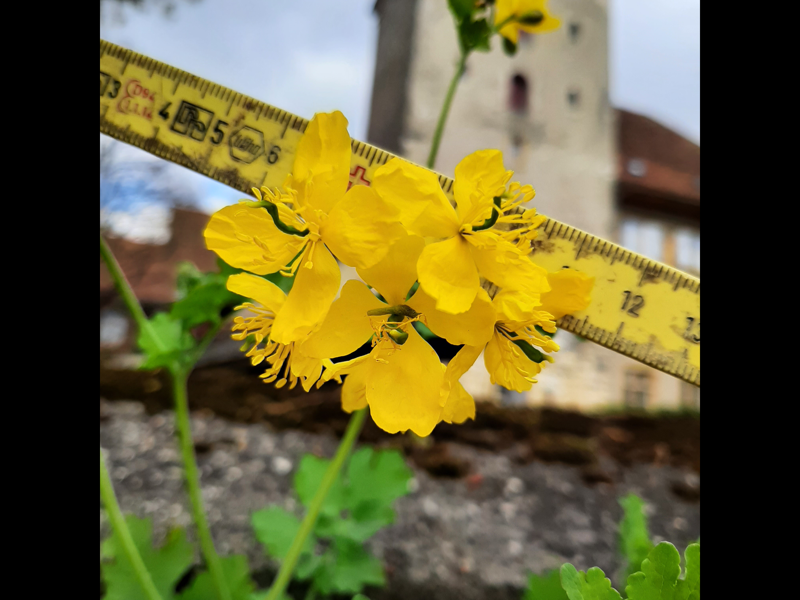

In [4]:
# generate banner image

this_picture = PILImage.open("resources/pictures/20210403_123904.jpg")
this_picture_r = this_picture.rotate(270)
output = io.BytesIO()
this_picture_r.thumbnail((800, 1200))

this_picture_r.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

## Background

Around 700 plant surveys were conducted, resulting in the identification of some 6800 plant species, between June 2020 and September 2021. mostly focused on the urban Suze river and its Madretschkanal variant in Biel/Bienne. This chapter contains some background on the surveyor and provides a general summary of the data and the key indicators, such as invasive species identified.

### Objectives
In the medium term, the objective is to efficiently collect actionable data on vascular plant biodiversity in the municipality and through automation provide cost effective analysis and reporting to improve management and stakeholder engagement. As discussed in the introduction, it is up to local managers to manage local diversity and this project aims to be a tool in helping them to do so effectively.

The short term objective therefor was to immediately start constructing an actionable dataset on the vascular plants in public areas around the city of Biel/Bienne, with the knowledge that this dataset can be combined with longer term monitoring initatives conducted by Infoflora, as well as information the city has, for example its registry of city trees.

### About the surveyor
Currently enrolled as a master student at the Oeschger Center for Climate Change Research, I am using these surveys to gather data for my thesis work on plant populations. Previously trained as an economist these surveys also served as avenue to quickly developy my knowledge of the local flora through testing image based plant identification applications and using the Flora Helvetica guidebook.


## Survey locations

In the first year, the focus was primarily on the urban Suze river and its Madretschkanal variant. Along this stretch of the river, as with many urban settings, there are many varied habitats, from deep shade to full pavement to flower strips maintained for ecological and aesthetic purposes. The sites are managed by the municipality to a greater or less degree and all areas surveyed were open access to the public and reasonably accessible for an average person. In 2021 the surveys included a wider geographic scope, but still largely remained in Biel and its environs. The zones surveyed ranged from railroad berms to green areas in the sidewalk in an effort to capture the diversity of herbaceous plants around the city.

The sites varied greatly in size and shape. The size of the sites was not recorded, but a detailed description of is available. In nearly all cases it is possible to recover the boundary of the sites based on the geometry of the object. For example, surveys were usually bounded by sidewalks, roads, or other barriers.

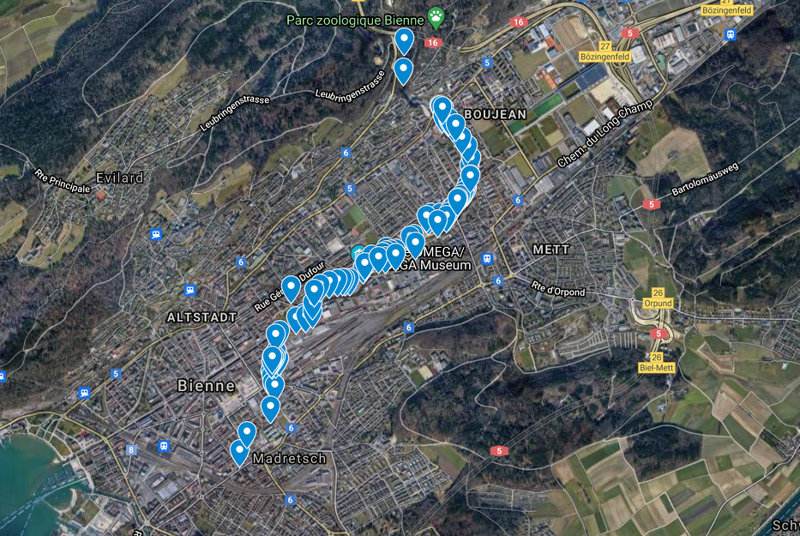

In [5]:
# generate mymaps image of year 1 survey sites in Biel/Bienne

this_picture = PILImage.open("resources/pictures/mymaps.png")
output = io.BytesIO()
this_picture.thumbnail((800, 1200))

this_picture.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

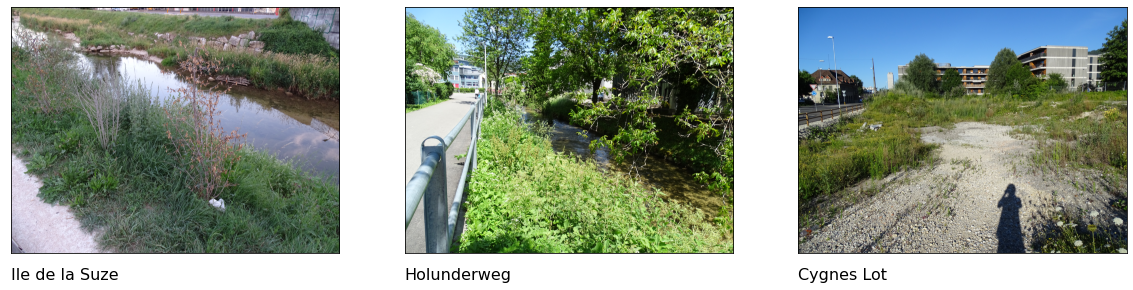

In [6]:
# generate images of survey sites

# read images
img_A = mpimg.imread('resources/pictures/DSC04657.JPG')
img_B = mpimg.imread('resources/pictures/suze-2.JPG')
img_C = mpimg.imread('resources/pictures/DSC02009.JPG')

# display the images
fig, ax = plt.subplots(1,3, figsize = (20,12))
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C)

# format axes to include labels and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_xlabel("Ile de la Suze", fontsize=16, loc='left', labelpad=15)
ax[1].set_xlabel("Holunderweg", fontsize=16, loc='left', labelpad=15)
ax[2].set_xlabel("Cygnes Lot", fontsize=16, loc='left', labelpad=15)

plt.show()

## Summary results

Over the course of the two years 480 unique species were identified, the majority in the second year. Initially in June 2020, the number of plants that could be reliably identified by the surveyor was relatively small, where as by June 2021, the surveyor could reliably identify the common species that dominate the landscape. In year one, most observations (40%) were recorded in August, while in year 2 most observations were recorded in July, but that was only 20% of the total for that year. Some other changes between year one and year two to consider are the following:
* Surveys were conducted from February - September in year 2 and only from June to September in year 1
* Around 5 times as many plants were identified in year 2 as in year 1
* The surveyor adopted the use of identification to the genus level in the second year for difficult to identify species
* Initially only plants *in flower* were identified. While this remained largely the case, some plants (e.g. *Hedera helix*) were widespread and could be identified with or without flowers.
* Some trees were included in the observations later in the second year.

The following tables provide some summary statistics.

*__Left:__ The number of unique species identifed, genus identified, and surveys per month. __Right:__ Some summary statistics.*

In [7]:
# functions for making tables, graphs and charts of the survey results

def make_a_summary_table(ax, data,colLabels, a_color="black", font_size=12, s_et_bottom_row=True):
    
    """Formats matplotlib table object.

    Args:
    ax: object: matplotlib table object
    data: array: the 2d array used to generate the table object
    cols_to_use: array: the list of column names
    a_color: str: matplotlib named color, face and edgecolor of table cells
    font_size: int: the font size for the table cells
    s_et_bottom_row: bool: whether or not to draw bottom line on the last row

    Returns:
    The table object formatted.
    """

    ax.auto_set_font_size(False)
    the_cells = ax.get_celld()

    line_color = colors.to_rgba(a_color)
    banded_color = (*line_color[:-1], 0.1)

    # the different areas of formatting
    top_row = [(0, i) for i in np.arange(len(colLabels))]
    bottom_row = [(len(data), i) for i in np.arange(len(colLabels))]
    data_rows = [x for x in list(the_cells.keys()) if x not in top_row]
        
    for a_cell in top_row:
        ax[a_cell].visible_edges = "B"
        ax[a_cell].set_text_props(**{"fontsize": font_size})
        ax[a_cell].set_edgecolor("black")
        ax[a_cell].PAD = .2
        ax[a_cell].set_linewidth = 1
        ax[a_cell].set_height(.5 / (len(data)))

    for a_cell in data_rows:
        ax[a_cell].set_height(.5 / (len(data)))
        ax[a_cell].visible_edges = "BT"
        ax[a_cell].set_text_props(**{"fontsize": font_size})
        ax[a_cell].set_edgecolor(banded_color)
        ax[a_cell]._text.set_horizontalalignment("center")
        ax[a_cell].set_linewidth = .1

    if s_et_bottom_row is True:
        
        for a_cell in bottom_row:
            ax[a_cell].visible_edges = "B"
            ax[a_cell].set_edgecolor(line_color)
            ax[a_cell].set_linewidth = 1

    return ax



def a_simple_formatted_table(ax,data,colLabels=[], a_color="black", colWidths=[], bbox=[], **kwargs):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param colLabels: The labels for the data table columns
    :type colLabels: array
    :param a_color: The color of the cell borders
    :type a_color: str
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    a = ax.table(data,  colLabels=colLabels, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    t = make_a_summary_table(a, data, colLabels, a_color=a_color, font_size=12, s_et_bottom_row=False)
    return t


def a_stacked_bar_chart(ax, bars, xaxis=[], totals={}, palette={}, **kwargs):
    """Makes a stacked barchart given a matplotlib < ax > object
    and a dictionary of values for each "row" of the stack.
    
    :param ax: A matplotlib axes object
    :type ax: matplotlib.axes
    :param bars: Dictionary of values for each row
    :type bars: dict
    :param xaxis: The values that define the xaxis, can be
         date or categorical
    :type xaxis: array
    :param totals: A dictionary for a second non stacked bar chart.
    :type totals: dict
    :Return: A matplotlib axes object with a stacked barchart.    
    """
    # set the bottom of the stacked bar chart
    bottom = 0
    
    if totals:
        # this is a seperate independent stack
        # its value does not effect the value of <bottom>
        ax.bar(xaxis, totals["data"], bottom=bottom, label=totals["label"], zorder=0)
    else:
        pass
    
    for a_bar in bars:
        if palette:
            ax.bar(xaxis, bars[a_bar]["data"], bottom=bottom, label=a_bar, color=palette[a_bar], zorder=2)
        else:
            ax.bar(xaxis, bars[a_bar]["data"], bottom=bottom, label=a_bar, zorder=2)
        
        # add the value of data to bottom
        bottom += bars[a_bar]["data"]
    
    return ax
def a_single_column_table(ax,data, fs=12, colWidths=[.7, .3], bbox=[0,0,1,1], kwargs={}):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param fs: The font size for the cell data
    :type fs: float, int
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    
    
    a = ax.table(data, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    a.auto_set_font_size(False)
    a.set_fontsize(fs)

    return a

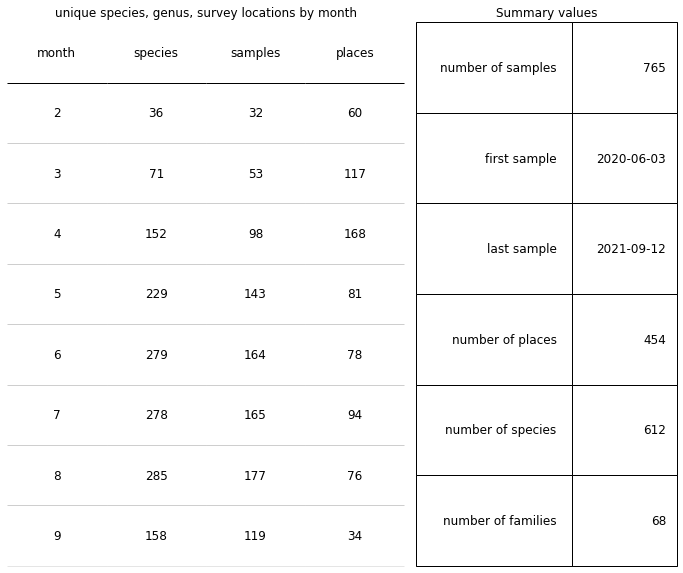

In [8]:
t_one = spd_allstats.groupby(["month"], as_index=False).agg({"species":"nunique", "genus":"nunique", "locname":"nunique"})
data_one = t_one.values
colLabels = [*t_one.columns[:-2], "samples", "places",]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

fig = plt.figure(figsize=(12,10))

gs = GridSpec(12,10)

axone = fig.add_subplot(gs[:, :6])
axtwo = fig.add_subplot(gs[:, 6:])


table_one = a_simple_formatted_table(axone,data_one,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")
axone.set_title("unique species, genus, survey locations by month")

# set up the tables of summary values for years 1 and 2
summary={
    "number of samples":spd_allstats.loc_date.nunique(),
    "first sample": spd_allstats["date"].min().date(),
    "last sample":spd_allstats["date"].max().date(),
    "number of places":spd_allstats.locname.nunique(),
    "number of species":spd_allstats.species.nunique(),
    "number of families":spd_allstats.fam.nunique(),    

}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()

b = a_single_column_table(axtwo, a_summary.values, colWidths=[.6, .4])
axtwo.axis("off")
axtwo.set_title("Summary values")

plt.show()

The vast majority of species identified were native, as can be seen from the following charts which decompose the species identified into native (rch & ns), non-native (ni), invasive (inv), and species identified only to the genus level (ongen). Despite a significant increase in the number of sites, the ratios remained relatively constant, aside from the growth of the "genus only" category in year 2.

At the same time, note that since this is only an identification study, these results do not indicate the relative biomass of native versus non-native species and a site may be dominated by a handful of species of either native or non-native origin. Note as well that indigenous species can acquire the attributes of a nonnative invasive species if it comes to dominate many habitats and reduce the overall biodiversity of areas due to its success.

In [9]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="allstats", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
spdas1 = spd_allstats.loc[spd_allstats["year"] == 1].copy()
spdas2 = spd_allstats.loc[spd_allstats["year"] == 2].copy()
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["allstats"]
not_these = ["X","-"]

period = "month"
column = "allstats"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
    "WL":"red",
    "BL":"black",
    "ongen":"fuchsia",
    "ns":"violet",
    "ni":"indigo"
}
    
    
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_as_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_as_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_as_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_as_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    

# rmp status per survey
all_stat = pd.DataFrame(spd_allstats[~spd_allstats[column].isin(not_these)].groupby(["loc_date","date"]).allstats.value_counts()).rename(columns={column:"data"}).reset_index()





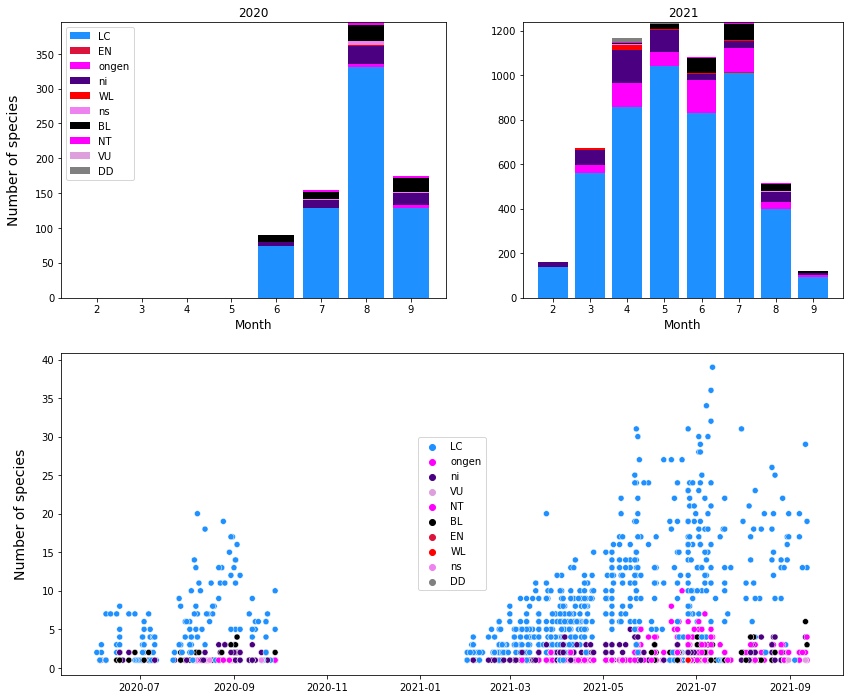

In [10]:
tick_spacing = 1

fig = plt.figure(figsize=(14,12))

gs = GridSpec(14,12)

axone = fig.add_subplot(gs[0:6, 0:6])
axtwo = fig.add_subplot(gs[0:6, 7:])
axthree = fig.add_subplot(gs[7:, :])

a_stacked_bar_chart(axone, red_list_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, red_list_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"


axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")
axone.legend()
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=all_stat, x="date", y="data", hue="allstats", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")
axthree.legend(loc='center')

plt.show()   

## Descriptions of the species categories

This analysis follows the classification and definition of the IUCN Redlist as presented by Info Flora in classifying all species that arrived after 1500 (the discovery of America) as non-native. Thus any species that is on the IUCN redlist classification from Infoflora is considered native, any species left off is considered non-native. Given the limited timescale of interactions between these species and native ecological systems, they are still likely providing much fewer resources to insects and other taxa than native plants would be. While there are counter examples of this phenomenon, for example where non-native species provide a reservoir to threatened species, it is generally the case that nonnative species are less ecologically valuable. Aside from the quite small categories of "ns" which are non-native but culturally valuable as well as native species not included in the IUCN red list, (totally 5 observations or.08% of all species recorded) all species in this study fall neatly into the native / IUCN or non-native categories.

### Non native, non-invasive (ni)
The vast majority of non-native plants are also not ivasive and most have no chance of establishing spontaneous populations in the wild or even in urban spaces. A good example of a common non native, non-invasive plant, classified as *ni* in the chart above, the annual *Conyza canadensis* (*Erigeron canadensis*) from Canada that thrives in disturbed areas around the city. It wsa identified in 12 locations in August and September 2021, however these numbers underplay the relative amount of the plant as it can seriously take over many areas as the below image illustrates. While the plant generally cedes its dominance as time passed ans thus is not considered invasive, it can still dominate areas during the succession phase. Another two examples of this category are *Onobrychis viciifolia*, common in fields and along road verges in late spring and early summer, and *Eupatorium cannabinum*, common along road verges and river banks.

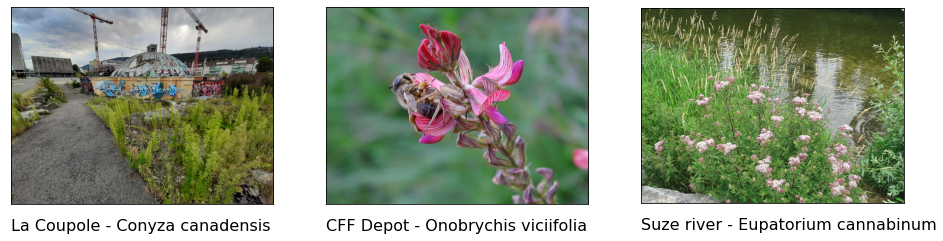

In [11]:
# generate images of survey sites

# read images
img_A = mpimg.imread('resources/pictures/20210822_192453.jpg')
img_B = mpimg.imread('resources/pictures/intro-1.jpg')
img_C = mpimg.imread('resources/pictures/Selection_028.png')

# display the images
fig, ax = plt.subplots(1,3, figsize = (16,10))
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)


# format axes to include label and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_xlabel("La Coupole - Conyza canadensis", fontsize=16, loc='left', labelpad=15)
ax[1].set_xlabel("CFF Depot - Onobrychis viciifolia", fontsize=16, loc='left', labelpad=15)
ax[2].set_xlabel("Suze river - Eupatorium cannabinum", fontsize=16, loc='left', labelpad=15)
plt.show()

In [ ]:
*__Above:__ interesting commentimage one.

As the below linechart shows, the number of unique non native and non invasive species identified peaked in April and May 2021.

*__Below:__ Unlike most other indicators, the number of unique species identified in the ni category
    peaked in April and May, which is before the peak of surveys and observations made in June, 
    July and August.*

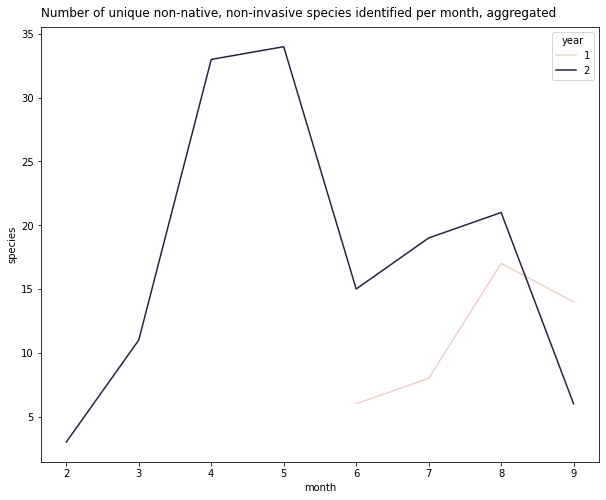

In [18]:
# use seaborne library to plot number of unique species identified in each month 
a = spd_allstats[spd_allstats["ni"]!= "X"]
b = a.groupby(["month","ni","year"]).agg({"species":"nunique","genus":"nunique"})
fig = plt.figure(figsize=(10,8))

sns.color_palette("dark")
sns.lineplot(x="month", y="species", hue = "year",
             data=b)
plt.title("Number of unique non-native, non-invasive species identified per month, aggregated", loc="left", pad=10)
plt.show()

### Invasive species

Of the non-native species a small percentage are actually considered invasive. In order to be considered invasive they must be able to reproduce in the wild and pose a threat to humans and the ecosystems. Info Flora maintains a list of the current watch list and black list species, a number of which were identified over the course of the survey. Some of them were purposefully introduced in a bygone era, such as the *Mahonia aquifolium*, which is planted throughout the Madretsch quarter in Biel/Bienne. Others have moved into empty lots of their own accord such as *Solidago canadensis* and *Erigeron Annuus*.

The following charts presents the blacklist (BL) and watchlist (WL) species identified per month in year 1 and year 2. The charts follow the overall pattern of survey, peaking in the same month as when the overall number of surveys peaked, namely in August for year 1 and in June-July for year 2. There is a significant increase in the number of invasive species identified from May to June that is greater than the increase in surveys conducted over this period.

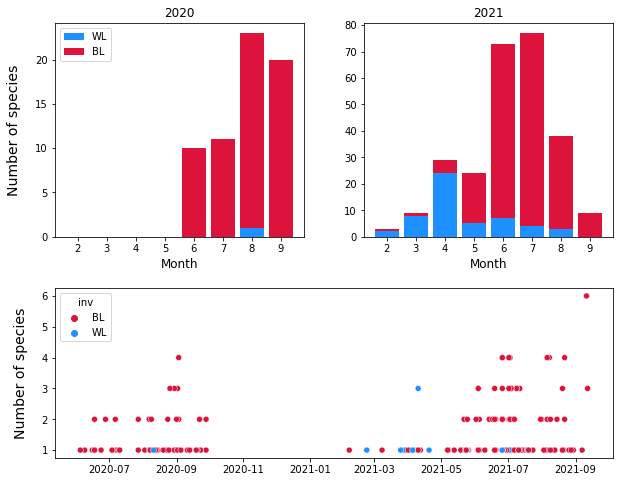

In [13]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="rch", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["inv"]
not_these = ["X","-"]

period = "month"
column = "inv"

biogeo = "mp"

a_palette = {
    "WL":"dodgerblue",
    "BL":"crimson",
}
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_rch_yone = periodic_value_counts(newDf, column, exclude=not_these)

inv_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_rch_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=inv_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_rch_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

inv_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_rch_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=inv_ytwo_bars)
    

# rmp status per survey
inv_stat = pd.DataFrame(spd[~spd[column].isin(not_these)].groupby(["loc_date","date"]).inv.value_counts()).rename(columns={column:"data"}).reset_index()



tick_spacing = 1

fig = plt.figure(figsize=(10,8))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[0:5, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, :])

a_stacked_bar_chart(axone, inv_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, inv_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"


axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")
axone.legend()
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=inv_stat, x="date", y="data", hue="inv", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")

plt.show()   

The number of unique invasive species identified on the blacklist and Watchlist rose from one species each identified in February, March and April to a high of 7 spcies and 4 species respectively, in July. To a certain extent this is due to counting plants in flower - some early populations of *Erigeron annuus* were found and a few scattered *Mahonia aquifolium* begain to flower in March and April.

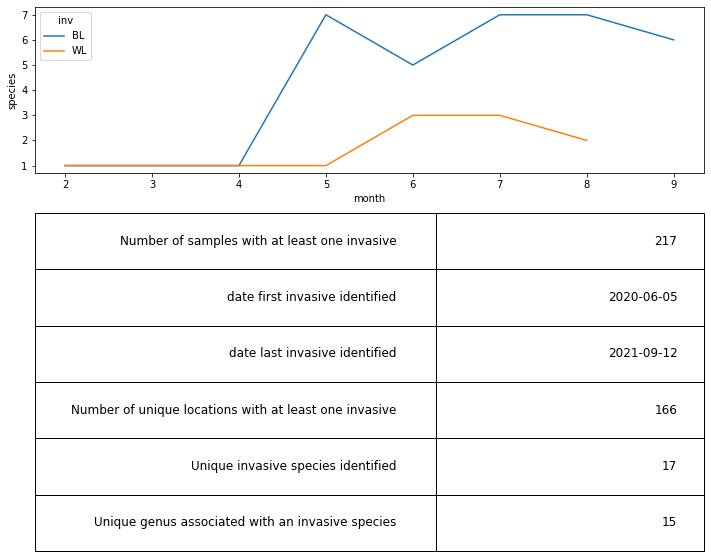

In [14]:
# use seaborne library to plot number of unique species identified in each month 
a = spd_allstats[spd_allstats["inv"]!= "X"]
b = a.groupby(["month","inv"]).agg({"species":"nunique","genus":"nunique"})

fig = plt.figure(figsize=(12,10))

gs = GridSpec(16,8)
axone = fig.add_subplot(gs[:5,:])
axtwo = fig.add_subplot(gs[6:,:])
sns.lineplot(ax=axone, x="month", y="species", hue = "inv",
             data=b)

summary={
    "Number of samples with at least one invasive":a.loc_date.nunique(),
    "date first invasive identified": a["date"].min().date(),
    "date last invasive identified":a["date"].max().date(),
    "Number of unique locations with at least one invasive":a.locname.nunique(),
    "Unique invasive species identified":a.species.nunique(),
    "Unique genus associated with an invasive species":a.genus.nunique(),

}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()
b = a_single_column_table(axtwo, a_summary.values, colWidths=[.6, .4])
axtwo.axis("off")

plt.show()

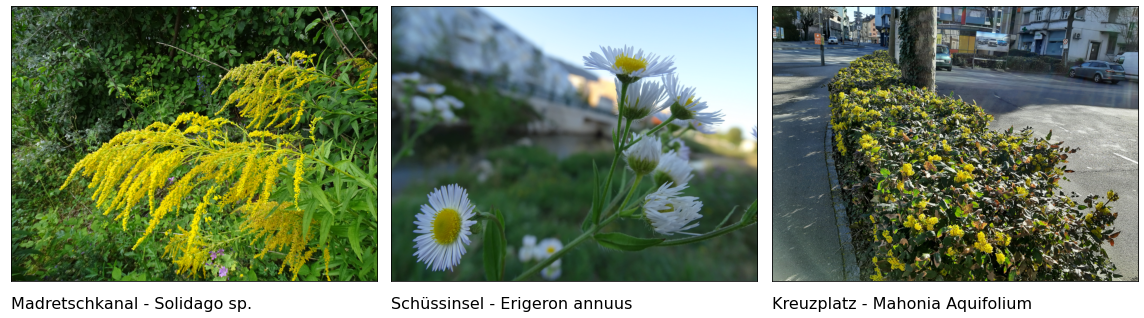

In [21]:
# Images for invasives

# read images
img_A = mpimg.imread('resources/pictures/DSC02758.JPG')
img_B = mpimg.imread('resources/pictures/iledelasuze2.JPG')
img_C = mpimg.imread('resources/pictures/20210404_093051.jpg')
img_C = ndimage.rotate(img_C,180)

# display the images
fig, ax = plt.subplots(1,3, figsize = (16,10))
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)

# format axes to include label and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[0].set_xlabel("Madretschkanal - Solidago sp.", fontsize=16, loc='left', labelpad=15)
ax[1].set_xlabel("Schüssinsel - Erigeron annuus", fontsize=16, loc='left', labelpad=15)
ax[2].set_xlabel("Kreuzplatz - Mahonia Aquifolium", fontsize=16, loc='left', labelpad=15)
plt.tight_layout()
plt.show()

### Redlist and priority list species middle plateau

The IUCN Red List is an internationally comparable ranking of the conservation status of individual species and biotopes. Infoflora worked with the IUCN to create a national redlist for Switzerland, last updated in 2016. This analysis was complemented in 2019 with the publishin of regional redlist data. This regional redlist data, categorized according to biogeographical regions, is what is used in this section. Switzerland is divided into six biogeographical regions, and Biel/Bienne is located in the Middle Plateau / Central Plateau. For the analysis here, I used the regional redlist data for the central plateau and only included observations within the central plateau, which is still the vast majority of survey locations and species identified - about 7000 of the 7500 observations.

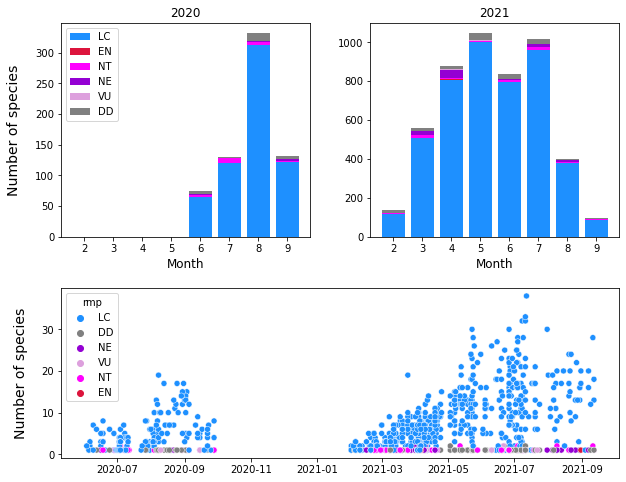

In [16]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="rch", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["rch","ni", "inv", "ongen"]
not_these = ["X","-"]

period = "month"
column = "rmp"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
}
    
    
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_rch_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_rch_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_rch_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_rch_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    

# rmp status per survey
rmp_stat = pd.DataFrame(spd[~spd[column].isin(not_these)].groupby(["loc_date","date"]).rmp.value_counts()).rename(columns={column:"data"}).reset_index()



tick_spacing = 1

fig = plt.figure(figsize=(10,8))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[0:5, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, :])

a_stacked_bar_chart(axone, red_list_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, red_list_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"


axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")
axone.legend()
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=rmp_stat, x="date", y="data", hue="rmp", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")

plt.show()   

*__Above:__ The below chart demonstrates the key point that most species found are classified as "Least Concern" (LC), which was easy to predict. The species themselves are widespread (hence the categorization of LC) and the surveys were conducted in disturbed, urban environments where one might be unlikely to find rare species.* 

### Conclusions discussion

### Year three 2022

The surveys will be repeated in year 3. Given the surveyor's additional experience with the subject matter, it is expected to collect significantly more observations and to continue to improve accuracy, efficiency, and geographic coverage. This increased data will also be relatively easier thanks to experience working with the data and having prewritten useful code for its analysis and visualization.

#### Objectives
The objective of year three is to build the predictive capacity of the data set to answer the following questions: Given the list of vascular plant species that occur in this area and this set of environmental data, what can I predict about the supported biodiversity ? What areas are most important for target species (bees/butterflies) throughout the year ?

This will require collecting plant occurence data on a wide array of habitats throughout the year and integrating this data into a format compatible for analysis with satellite and GIS data from the municipalaity. In additon 

#### Survey period and regularity
Surveys will be conducted from late February through October 2022. This is to capture the early and late blooming flowers that are especially important for hibernating insect species. Ideally each location will be surveyed on a bi-monthly basis to capture the seasonality of the flowering populations, but this will likely not be a possible schedule to maintain for all observation. Thus, a core group of locations will receive this treatment, while other locations will be surveyed opportunistically with the aim of establishing a solid coverage of the municipality of Biel/Bienne.

#### Locations
The surveys will again be focused on Biel and the immediate surrounding periurban region. The same locations will be surveyed as in 2021. There are some differences between year 2 and year 3:
* Further locations will be included to more fully capture the Madretschkanal and Suze rivers and broaden the analysis to include other renaturalization and planting efforts.
* Further surveys in La Chaux-de-Fonds, as well as urban regions between Biel and Bern.
* Locations will be standardized to be compatible with (automated) satellite imagery based size estimation and with the GIS system of Biel.
* Locations will be assigned one or more habitat types according to the TypoCH classifaction

#### Tools and methodology
The surveys will be conducted using the infoflora app on an android smartphone (Samsung A51). Surveys will again be focused on identification of species and not an estimation of ground cover or dominance. The following differences will be registered:
* The InfoFlora app will be used for all surveys.
* A picture will be saved for as many observations as feasible. 
* The survey location methodology will be modified (see above)
* Plants will be recorded as soon as a reliable observation can be made, without necessarily waiting for the species to flower. This will affect primarily observations of "evergreens" which will be recorded early in the year.

#### Additional data
A major focus of year three is the compatibility of this data set with the needs of the municipal, cantonal and federal managers of green spaces and biodiversity. As such, a more active approach to the integration of data from Infoflora, the municipality of Biel/Bienna and surrounding communes. In addition, in order to investigate the results of interventions that have taken place over the years, data will be sought out on renaturalization projects to attempt to identify outcomes.

